## Занятие 7
## Математический анализ
## Исследование функции с sympy.calculus.util и sympy.calculus.singularities

In [2]:
import sympy
from sympy import S, Interval, plot
from sympy import sin as Sin
from sympy import cos as Cos
from sympy import exp as Exp
from sympy import log as Log
from sympy import pi as Pi
from sympy.calculus.util import continuous_domain, function_range, periodicity, stationary_points, maximum, minimum, AccumBounds
from sympy.calculus.singularities import singularities, is_increasing, is_decreasing, is_monotonic
from sympy.calculus.singularities import is_strictly_increasing, is_strictly_decreasing
%matplotlib inline

## Схема анализа функции.
1. Область определения

sympy.calculus.util.continuous_domain(f, symbol, domain)

f - выражение, описывающее функцию, 

symbol - переменная, от которой зависит исследуемая функция,

domain - область значений переменной, на которой рассматривается функция,

если функция рассматривается на всей вещественной прямой, то domain=S.Reals

Сингулярные точки (точки, в которых функция не существует) находятся с помощью

sympy.calculus.singularities.singularities(f, symbol, domain=None)

2. Область значений

sympy.calculus.util.function_range(f, symbol, domain)

3. Периодичность

sympy.calculus.util.periodicity(f, symbol, check=False)

4. Стационарные точки 

sympy.calculus.util.stationary_points(f, symbol, domain=Reals)

5. Точки экстремума

sympy.calculus.util.maximum(f, symbol, domain=Reals)

sympy.calculus.util.minimum(f, symbol, domain=Reals)

6. Монотонность

sympy.calculus.singularities.is_decreasing(f, interval=Reals, symbol=None)

sympy.calculus.singularities.is_increasing(f, interval=Reals, symbol=None)

sympy.calculus.singularities.is_monotonic(f, interval=Reals, symbol=None)

sympy.calculus.singularities.is_strictly_decreasing(f, interval=Reals, symbol=None)

sympy.calculus.singularities.is_strictly_increasing(f, interval=Reals, symbol=None)

7. Минимальное и максимальное значение функции на интервале 

sympy.calculus.util.AccumulationBounds(min, max)

Свойства: delta, max, min, mid

### Задание 1.  
Исследовать функцию по п.1 - 5 на области определения и по п. 1 - 7 на одном периоде, построить график.
$$
f(x) = e^{\sin(x)}.
$$
###### 1. Область определения

In [7]:
from sympy.abc import x
f = sympy.E ** Sin(x)
D = continuous_domain(f, x, S.Reals)
D

Reals

Сингулярные точки (точки, где функция не определена)

In [8]:
singularities(f, x)

EmptySet

###### 2. Область значений

In [9]:
function_range(f, x, S.Reals)

Interval(exp(-1), E)

###### 3. Периодичность

In [10]:
periodicity(f, x, check=False)

2*pi

###### 4. Стационарные точки

In [12]:
stationary_points(f, x)

Union(ImageSet(Lambda(_n, 2*_n*pi + pi/2), Integers), ImageSet(Lambda(_n, 2*_n*pi + 3*pi/2), Integers))

###### 5. Максимальное и минимальное значения функции

In [13]:
display(maximum(f, x), minimum(f, x))

E

exp(-1)

##### Исследование периодической функции на одном периоде.
Найти пересечение с периодом области определения, множества сингулярных точек и стационарных точек.
###### 1. Область определения

In [15]:
period_pi = Interval(Pi/2, 5*Pi/2)
continuous_domain(f, x, period_pi)

Interval(pi/2, 5*pi/2)

Сингулярные точки (точки, где функция не определена)

In [17]:
singularities(f, x, period_pi)

EmptySet

###### 2. Область значений

In [18]:
function_range(f, x, period_pi)

Interval(exp(-1), E)

###### 4. Стационарные точки 

In [23]:
stationary_points(f, x, period_pi)

FiniteSet(pi/2, 3*pi/2, 5*pi/2)

###### 5. Максимальное и минимальное значения функции

In [20]:
display(maximum(f, x, period_pi), minimum(f, x, period_pi))

E

exp(-1)

###### 6. Монотонность
Исследовать на периоде открытые интервалы (Interval.open), на которые период разбивают стационарные точки.

In [26]:
intervals = [Interval.open(Pi/2, 3*Pi/2), Interval.open(3*Pi/2, 5*Pi/2)]
for interval in intervals:
    display(interval)
    print(is_monotonic(f, interval=interval), 
           is_decreasing(f, interval=interval), 
           is_increasing(f, interval=interval), 
           is_strictly_decreasing(f, interval=interval), 
           is_strictly_increasing(f, interval=interval))

Interval.open(pi/2, 3*pi/2)

True None None None None


Interval.open(3*pi/2, 5*pi/2)

True None None None None


###### 7. Минимальное и максимальное значение функции на интервале 
Найти максимальное и минимальное значение функции на каждом из интервалов монотонности в пределах одного периода

In [28]:
for left, right in [[Pi/2, 3*Pi/2], [3*Pi/2, 5*Pi/2]]:
    display(Interval.open(left, right))
    f_AccB = f.subs(x, AccumBounds(left, right))
    display(f_AccB, f_AccB.max, f_AccB.min, f_AccB.delta, f_AccB.mid)
    print("--------")

Interval.open(pi/2, 3*pi/2)

AccumBounds(exp(-1), E)

E

exp(-1)

E - exp(-1)

exp(-1)/2 + E/2

--------


Interval.open(3*pi/2, 5*pi/2)

AccumBounds(exp(-1), E)

E

exp(-1)

E - exp(-1)

exp(-1)/2 + E/2

--------


###### График функции на одном периоде.

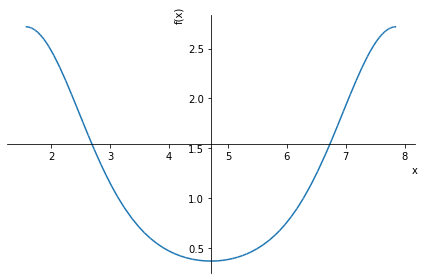

In [34]:
plot((f, (x, Pi/2, 5*Pi/2)))

### Задание 2.  
Исследовать функцию по п.1 - 5 на области определения и по п. 1 - 7  на одном периоде, построить график.
$$
f(x) = \frac{1}{\sin(x) + \cos(x)}.
$$
###### 1. Область определения

In [3]:
from sympy.abc import x
f = 1 / (Sin(x) + Cos(x))
D = continuous_domain(f, x, S.Reals)
D

Complement(Reals, Union(ImageSet(Lambda(_n, 2*_n*pi + 3*pi/4), Integers), ImageSet(Lambda(_n, 2*_n*pi + 7*pi/4), Integers)))

Сингулярные точки (точки, где функция не определена)

In [5]:
singularities(f, x)

Union(ImageSet(Lambda(_n, 2*_n*pi + 3*pi/4), Integers), ImageSet(Lambda(_n, 2*_n*pi + 7*pi/4), Integers))

###### 2. Область значений

In [6]:
function_range(f, x, S.Reals)

Union(Interval(-oo, -sqrt(2)/2), Interval(sqrt(2)/2, oo))

###### 3. Периодичность

In [7]:
periodicity(f, x, check=False)

2*pi

###### 4. Стационарные точки

In [9]:
stationary_points(f, x)

Union(Complement(ImageSet(Lambda(_n, 2*_n*pi + 5*pi/4), Integers), Union(ImageSet(Lambda(_n, 2*_n*pi + 3*pi/4), Integers), ImageSet(Lambda(_n, 2*_n*pi + 7*pi/4), Integers))), Complement(ImageSet(Lambda(_n, 2*_n*pi + pi/4), Integers), Union(ImageSet(Lambda(_n, 2*_n*pi + 3*pi/4), Integers), ImageSet(Lambda(_n, 2*_n*pi + 7*pi/4), Integers))))

###### 5. Максимальное и минимальное значения функции

In [10]:
display(maximum(f, x), minimum(f, x))

oo

-oo

##### Исследование периодической функции на одном периоде.
Найти пересечение с периодом области определения, множества сингулярных точек и стационарных точек.
###### 1. Область определения

In [25]:
period_pi = Interval(Pi / 4, 9 * Pi / 4)
continuous_domain(f, x, period_pi)

Union(Interval.Ropen(pi/4, 3*pi/4), Interval.open(3*pi/4, 7*pi/4), Interval.Lopen(7*pi/4, 9*pi/4))

Сингулярные точки (точки, где функция не определена)

In [26]:
singularities(f, x, period_pi)

FiniteSet(3*pi/4, 7*pi/4)

###### 2. Область значений

In [27]:
function_range(f, x, period_pi)

Union(Interval(-oo, -sqrt(2)/2), Interval(sqrt(2)/2, oo))

###### 4. Стационарные точки

In [28]:
stationary_points(f, x, period_pi)

FiniteSet(pi/4, 5*pi/4, 9*pi/4)

###### 5. Максимальное и минимальное значения функции

In [29]:
display(maximum(f, x, period_pi), minimum(f, x, period_pi))

oo

-oo

###### 6. Монотонность

In [31]:
intervals = [Interval.open(k*Pi/4, (k + 2)*Pi/4) for k in range(3, 9, 2)]
for interval in intervals:
    display(interval)
    print(is_monotonic(f, interval=interval),
    is_decreasing(f, interval=interval), is_increasing(f, interval=interval),
    is_strictly_decreasing(f, interval=interval), is_strictly_increasing(f, interval=interval))


Interval.open(3*pi/4, 5*pi/4)

True False True False True


Interval.open(5*pi/4, 7*pi/4)

True True False True False


Interval.open(7*pi/4, 9*pi/4)

True False False False False


###### 7. Минимальное и максимальное значение функции на периоде

In [33]:
intervals = [[k*Pi/4, (k + 2)*Pi/4] for k in range(3, 9, 2)]
for left, right in intervals:
    display(Interval.open(left, right))
    f_AccB = f.subs(x, AccumBounds(left, right))
    display(f_AccB, f_AccB.max, f_AccB.min, f_AccB.delta, f_AccB.mid)
    print("-----------")

Interval.open(3*pi/4, 5*pi/4)

AccumBounds(-oo, 1/(-1 - sqrt(2)/2))

1/(-1 - sqrt(2)/2)

-oo

oo

-oo

-----------


Interval.open(5*pi/4, 7*pi/4)

AccumBounds(-oo, 1/(-1 - sqrt(2)/2))

1/(-1 - sqrt(2)/2)

-oo

oo

-oo

-----------


Interval.open(7*pi/4, 9*pi/4)

AccumBounds(1/(sqrt(2)/2 + 1), oo)

oo

1/(sqrt(2)/2 + 1)

oo

oo

-----------


###### График

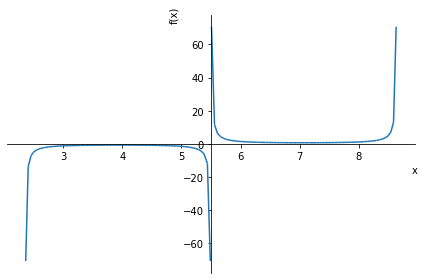

In [41]:
plot((f, (x, 3*Pi/4+0.01, 7*Pi/4-0.01)), (f, (x, 7*Pi/4+0.01, 11*Pi/4-0.01)))

### Индивидуальное задание.  
Исследовать функцию $f(x)$, найти минимальное и максимальное значение на каком-нибудь конечном интервале, не содержащем точек разрыва, построить график.
###### 1. Область определения

Вариант 36

$f(x) = 4 x^{2} \sqrt{2 - x^{2}}$

In [51]:
from sympy.abc import x
f = 4*x*x*(2-x*x)**(1/2)
period_pi = Interval(-1, 1)
continuous_domain(f, x, period_pi)

Interval(-1, 1)

Сингулярные точки (точки, где функция не определена)

In [52]:
singularities(f, x, period_pi)

EmptySet

###### 2. Область значений

In [55]:
function_range(f, x, period_pi)

NotImplementedError: Unable to find critical points for 4*x**2*(2 - x**2)**0.5

###### 3. Периодичность

In [56]:
periodicity(f, x, check=False)

###### 4. Стационарные точки

In [57]:
stationary_points(f, x, period_pi)

ConditionSet(x, Eq(-4.0*x**3*(2 - x**2)**(-0.5) + 8*x*(2 - x**2)**0.5, 0), Interval(-1, 1))

###### 5. Максимальное и минимальное значения функции

In [58]:
display(maximum(f, x, period_pi), minimum(f, x, period_pi))

NotImplementedError: Unable to find critical points for 4*x**2*(2 - x**2)**0.5

###### 6. Монотонность  

In [59]:
intervals = [period_pi]
for interval in intervals:
    display(interval)
    print(is_monotonic(f, interval=interval),
    is_decreasing(f, interval=interval), is_increasing(f, interval=interval),
    is_strictly_decreasing(f, interval=interval), is_strictly_increasing(f, interval=interval))


Interval(-1, 1)

False None None None None


###### 7. Минимальное и максимальное значение функции на интервале 

In [60]:
intervals = [[-1, 1]]
for left, right in intervals:
    display(Interval.open(left, right))
    f_AccB = f.subs(x, AccumBounds(left, right))
    display(f_AccB, f_AccB.max, f_AccB.min, f_AccB.delta, f_AccB.mid)
    print("-----------")

Interval.open(-1, 1)

ValueError: The argument 'nan' is not comparable.

###### График

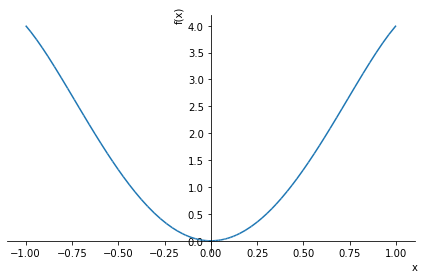

In [61]:
plot((f, (x, -1, 1)))